# Pembukaan

Assalamualaikum warahmatullahi wabarakatuh. Mohon ijin pimpinan 🙏🏽 . Dengan ini saya sampaikan data mengenai persekolahan di Indonesia, wabil khusus perbandingan antara kondisi nasional dan Papua (Provinsi Papua dan Provinsi Papua Barat). Data diperoleh dari situs [Data Pokok Pendidikan Dasar dan Menengah](https://dapo.dikdasmen.kemdikbud.go.id/).

Maksud dan tujuan dari ini adalah untuk belajar apa yang sekiranya terjadi di Papua (meskipun hanya secuil), setidaknya dari segi pendidikan. Kode, slide presentasi, dan notebook dapat ditengok di https://github.com/ledwindra/pendidikan-papua. Silakan gunakan sesuka hati, klik `Star ⭐️` jika suka dengan projek ini, atau lempar kritik maupun caciannya di `Issues ⚠️`.

<img src="https://media.giphy.com/media/87gYYkSC09QetBBHge/giphy.gif" width="500" align="center">

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
from bs4 import BeautifulSoup

In [2]:
df = pd.read_csv('./data/subdistrict.csv', header=None)
df.columns = [
    'nama',
    'sekolah_id',
    'kode_wilayah_induk_kecamatan',
    'induk_provinsi',
    'kode_wilayah_induk_provinsi',
    'bentuk_pendidikan',
    'status_sekolah',
    'sekolah_id_enkrip'
]
df['sekolah_id_enkrip'] = df.apply(lambda x: x['sekolah_id_enkrip'].replace(' ', ''), axis=1)

In [3]:
df.shape[0] == df['sekolah_id_enkrip'].nunique()

True

In [4]:
len(df[df['induk_provinsi'] == 'Prov. Papua']) + len(df[df['induk_provinsi'] == 'Prov. Papua Barat'])

5254

In [5]:
sch = pd.read_csv('./data/school.csv', header=None)
sch.columns = [
    'rombel',
    'guru_kelas',
    'guru_matematika',
    'guru_bahasa_indonesia',
    'guru_bahasa_inggris',
    'guru_sejarah_indonesia',
    'guru_pkn',
    'guru_penjaskes',
    'guru_agama_budi_pekerti',
    'guru_seni_budaya',
    'ptk_laki',
    'ptk_perempuan',
    'pegawai_laki',
    'pegawai_perempuan',
    'pd_kelas_1_laki',
    'pd_kelas_1_perempuan',
    'pd_kelas_2_laki',
    'pd_kelas_2_perempuan',
    'pd_kelas_3_laki',
    'pd_kelas_3_perempuan',
    'pd_kelas_4_laki',
    'pd_kelas_4_perempuan',
    'pd_kelas_5_laki',
    'pd_kelas_5_perempuan',
    'pd_kelas_6_laki',
    'pd_kelas_6_perempuan',
    'pd_kelas_7_laki',
    'pd_kelas_7_perempuan',
    'pd_kelas_8_laki',
    'pd_kelas_8_perempuan',
    'pd_kelas_9_laki',
    'pd_kelas_9_perempuan',
    'pd_kelas_10_laki',
    'pd_kelas_10_perempuan',
    'pd_kelas_11_laki',
    'pd_kelas_11_perempuan',
    'pd_kelas_12_laki',
    'pd_kelas_12_perempuan',
    'pd_kelas_13_laki',
    'pd_kelas_13_perempuan',
    'jumlah_kirim',
    'ptk',
    'pegawai',
    'pd',
    'pd_laki',
    'pd_perempuan',
    'jml_rk',
    'jml_lab',
    'jml_perpus',
    'identitas_valid',
    'ptk_valid',
    'pd_valid',
    'prasarana_valid',
    'total_valid',
    'kecukupan_air',
    'memproses_air',
    'minum_siswa',
    'siswa_bawa_air',
    'toilet_siswa_kk',
    'sumber_air_str',
    'ketersediaan_air',
    'tipe_jamban',
    'jml_wastafel',
    'a_sabun_air_mengalir',
    'jml_jamban_digunakan',
    'jml_jamban_tidak_digunakan',
    'sekolah_id_enkrip'
]

In [6]:
df.shape[0] == df['sekolah_id_enkrip'].nunique() == sch['sekolah_id_enkrip'].nunique()

True

In [7]:
sch = sch.drop_duplicates()
df = pd.merge(df, sch, how='inner', on='sekolah_id_enkrip')
df.shape

(220098, 74)

In [8]:
get_mean = lambda x: df.groupby('groups')[x].agg('mean').reset_index()

In [9]:
def get_percentage(metrics):
    papua = {
        'groups': 'Papua',
        f'{metrics}_pct': len(df[(df['groups'] == 1) & (df[metrics] == True)]) / len(df[df['groups'] == 1])
    }
    non_papua = {
        'groups': 'Non-Papua',
        f'{metrics}_pct': len(df[(df['groups'] == 2) & (df[metrics] == True)]) / len(df[df['groups'] == 2])
    }
    
    return pd.DataFrame([papua, non_papua])

In [10]:
def get_bar(metrics, ycol, title):

    ax = sns.catplot(
        x=['Papua', 'Non-Papua'],
        y=ycol,
        data=metrics,
        kind='bar'
    )
    ax.set(
        xlabel='',
        ylabel='',
        title=title
    )

In [11]:
def get_bar_multiple(metrics, title):
    data = list(set((df[metrics])))
    data = [str(x) for x in data]
    data = sorted(data)
    data = dict(zip(data, data))
    data = dict((re.sub(' |\/', '_', key).lower(), value) for (key, value) in data.items())
    for key, value in data.items():
        if key != 'nan':
            df[key] = df.apply(lambda x: x[metrics] == value, axis=1)
            data = df.groupby(['groups', key])['sekolah_id_enkrip'].agg('count').to_frame().reset_index()
            get_bar(get_percentage(key), f'{key}_pct', f'{title}: {value}')

## Perbandingan jumlah rata-rata nasional dan Papua
Perlu dicatat bahwa dalam konteks ini Provinsi Papua dan Papua Barat dijadikan satu.

In [12]:
df['is_papua'] = df.apply(lambda x: (x['induk_provinsi'] == 'Prov. Papua') | (x['induk_provinsi'] == 'Prov. Papua Barat'), axis=1)
pd.DataFrame(df.groupby('is_papua').size(), columns=['count']).reset_index()

,is_papua,count
0,False,214844
1,True,5254


In [13]:
def recode_province(x):
    if (x['induk_provinsi'] == 'Prov. Papua') | (x['induk_provinsi'] == 'Prov. Papua Barat'):
        return 'Papua or West Papua'
    else:
        return 'Non-Papua'

In [14]:
df['groups'] = df.apply(recode_province, axis=1)
groups_num = {'Papua or West Papua': 1, 'Non-Papua': 2}
df = df.replace({'groups': groups_num})
pd.DataFrame(df.groupby('groups').size(), columns=['count']).reset_index()

,groups,count
0,1,5254
1,2,214844


### Guru kelas

In [15]:
# meaningless data from source
get_mean('guru_kelas')

,groups,guru_kelas
0,1,0.0
1,2,0.0


### Guru matematika

In [16]:
# meaningless data from source
get_mean('guru_matematika')

,groups,guru_matematika
0,1,0.0
1,2,0.0


### Guru bahasa Indonesia

In [17]:
# meaningless data from source
get_mean('guru_bahasa_indonesia')

,groups,guru_bahasa_indonesia
0,1,0.0
1,2,0.0


### Guru bahasa Inggris

In [18]:
# meaningless data from source
get_mean('guru_bahasa_inggris')

,groups,guru_bahasa_inggris
0,1,0.0
1,2,0.0


### Guru sejarah Indonesia

In [19]:
# meaningless data from soure
get_mean('guru_sejarah_indonesia')

,groups,guru_sejarah_indonesia
0,1,0.0
1,2,0.0


### Guru PKN

In [20]:
# meaningless data from source
get_mean('guru_pkn')

,groups,guru_pkn
0,1,0.0
1,2,0.0


### Guru penjaskes

In [21]:
# meaningless data from source
get_mean('guru_penjaskes')

,groups,guru_penjaskes
0,1,0.0
1,2,0.0


### Guru agama budi pekerti

In [22]:
# meaningless data from source
get_mean('guru_agama_budi_pekerti')

,groups,guru_agama_budi_pekerti
0,1,0.0
1,2,0.0


### Guru seni budaya

In [23]:
# meaningless data from source
get_mean('guru_seni_budaya')

,groups,guru_seni_budaya
0,1,0.0
1,2,0.0


### Pendidik dan tenaga kependidikan (PTK)

In [24]:
get_mean('ptk')

,groups,ptk
0,1,8.618010
1,2,12.505888


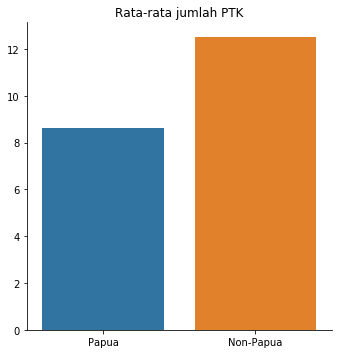

In [25]:
get_bar(get_mean('ptk'), 'ptk', 'Rata-rata jumlah PTK')

In [26]:
get_mean('ptk_laki')

,groups,ptk_laki
0,1,3.507520
1,2,4.352846


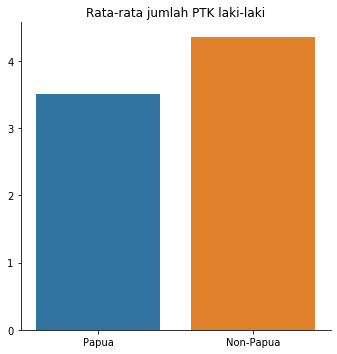

In [27]:
get_bar(get_mean('ptk_laki'), 'ptk_laki', 'Rata-rata jumlah PTK laki-laki')

In [28]:
get_mean('ptk_perempuan')

,groups,ptk_perempuan
0,1,5.110490
1,2,8.153043


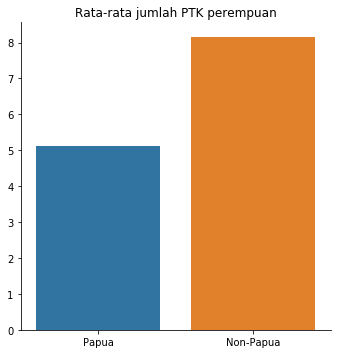

In [29]:
get_bar(get_mean('ptk_perempuan'), 'ptk_perempuan', 'Rata-rata jumlah PTK perempuan')

### Pegawai

In [30]:
get_mean('pegawai')

,groups,pegawai
0,1,1.662167
1,2,3.032086


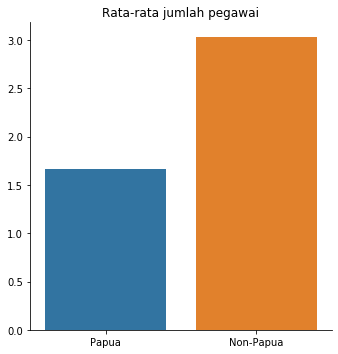

In [31]:
get_bar(get_mean('pegawai'), 'pegawai', 'Rata-rata jumlah pegawai')

In [32]:
get_mean('pegawai_laki')

,groups,pegawai_laki
0,1,1.089857
1,2,1.788070


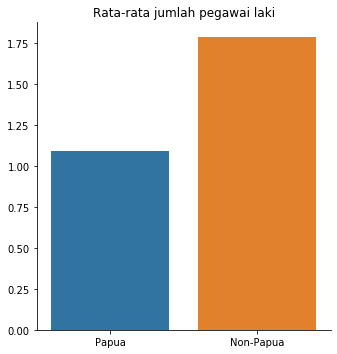

In [33]:
get_bar(get_mean('pegawai_laki'), 'pegawai_laki', 'Rata-rata jumlah pegawai laki')

In [34]:
get_mean('pegawai_perempuan')

,groups,pegawai_perempuan
0,1,0.572310
1,2,1.244016


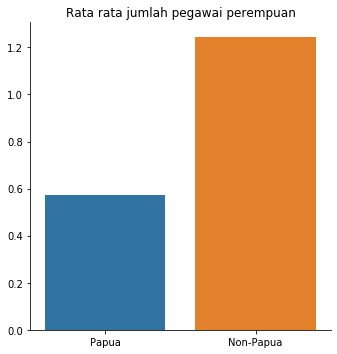

In [35]:
get_bar(get_mean('pegawai_perempuan'), 'pegawai_perempuan', 'Rata rata jumlah pegawai perempuan')

### Peserta didik (PD)

In [36]:
get_mean('pd')

,groups,pd
0,1,170.388405
1,2,205.402583


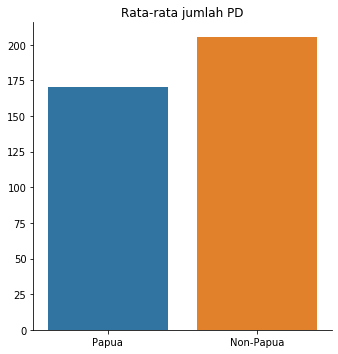

In [37]:
get_bar(get_mean('pd'), 'pd', 'Rata-rata jumlah PD')

In [38]:
get_mean('pd_laki')

,groups,pd_laki
0,1,92.001781
1,2,106.054270


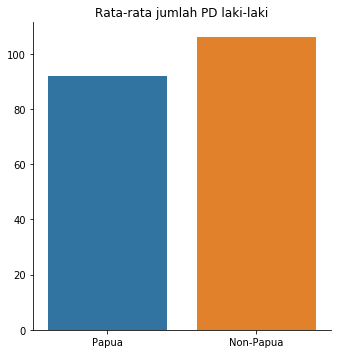

In [39]:
get_bar(get_mean('pd_laki'), 'pd_laki', 'Rata-rata jumlah PD laki-laki')

In [40]:
get_mean('pd_perempuan')

,groups,pd_perempuan
0,1,78.386624
1,2,99.348313


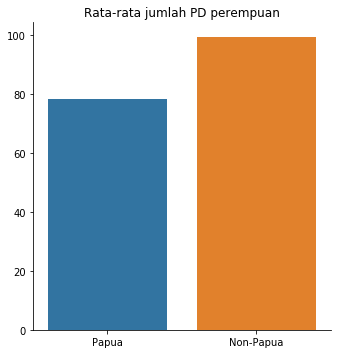

In [41]:
get_bar(get_mean('pd_perempuan'), 'pd_perempuan', 'Rata-rata jumlah PD perempuan')

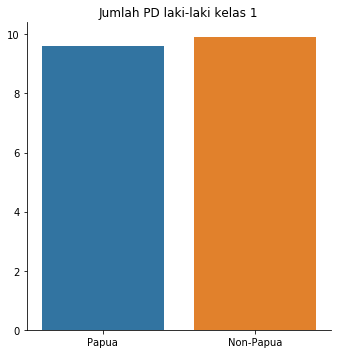

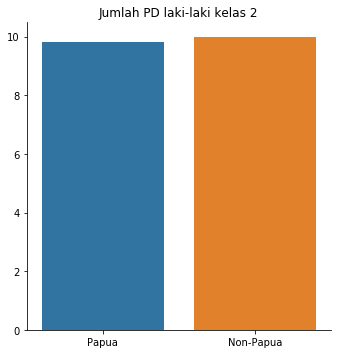

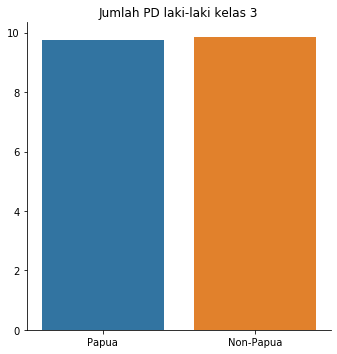

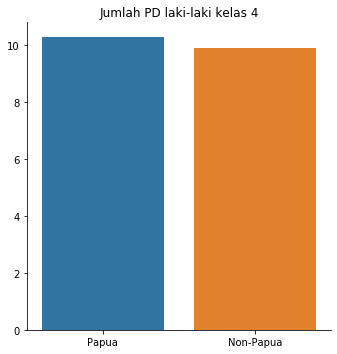

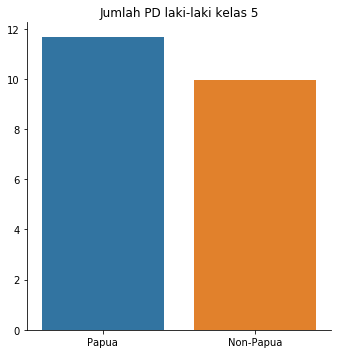

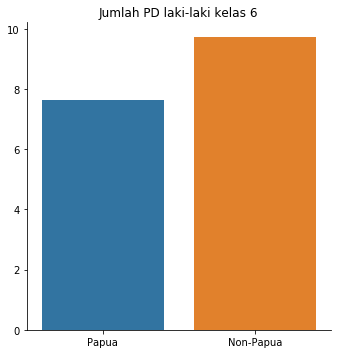

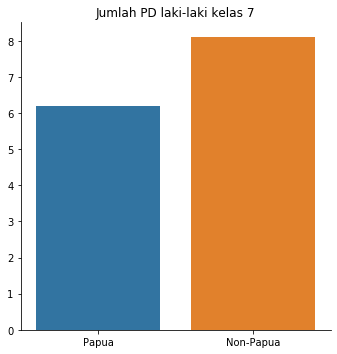

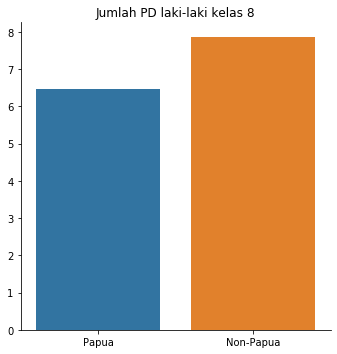

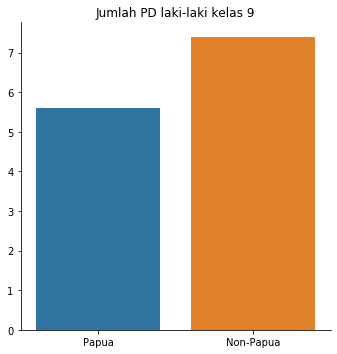

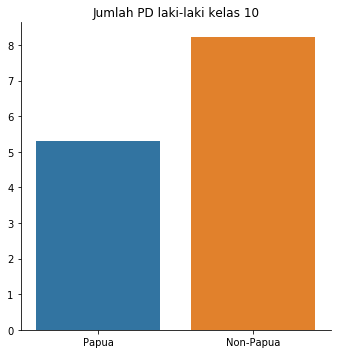

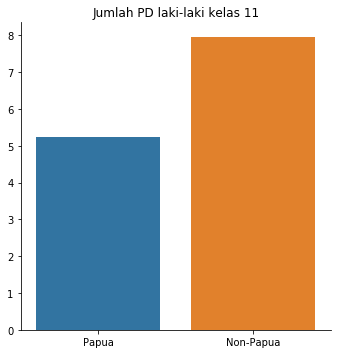

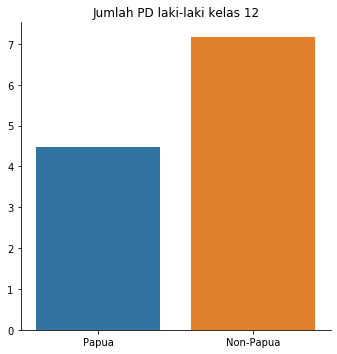

In [42]:
for i in range(1, 13):
    pd_laki = get_mean(f'pd_kelas_{i}_laki')
    get_bar(pd_laki, f'pd_kelas_{i}_laki', f'Jumlah PD laki-laki kelas {i}')

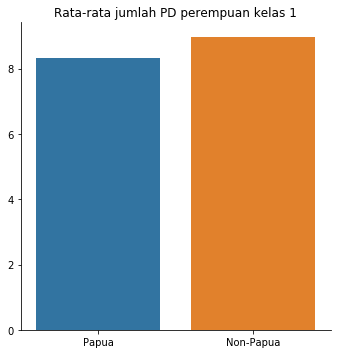

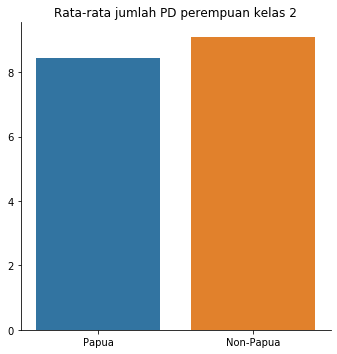

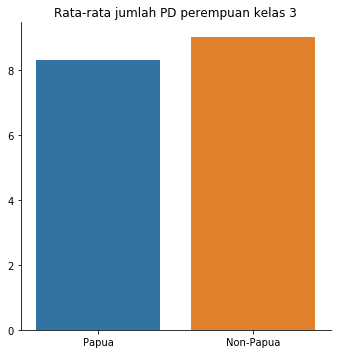

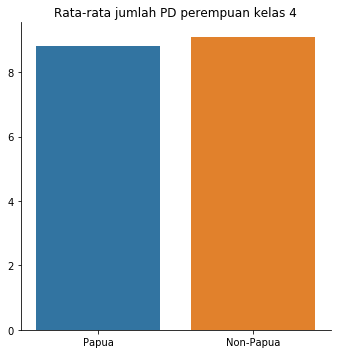

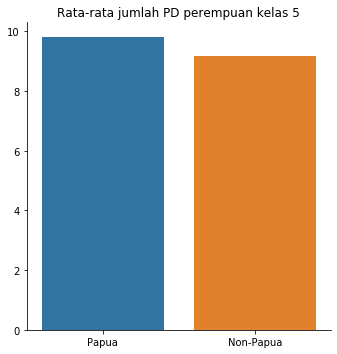

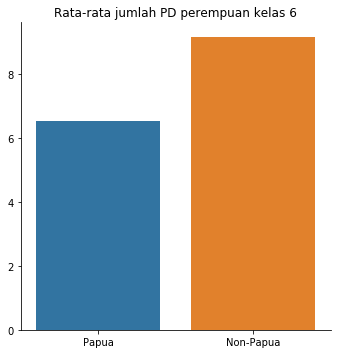

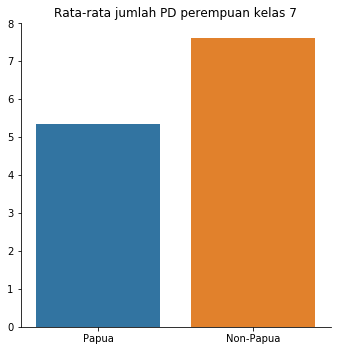

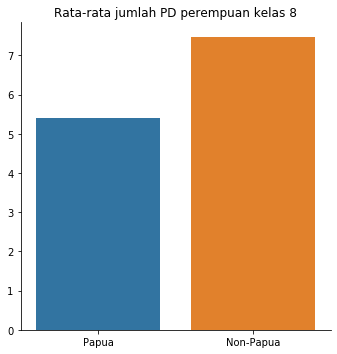

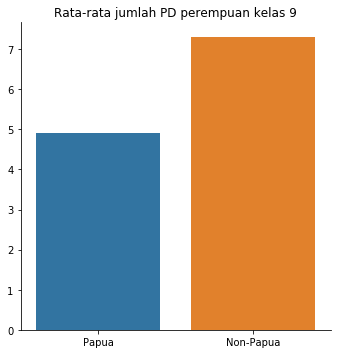

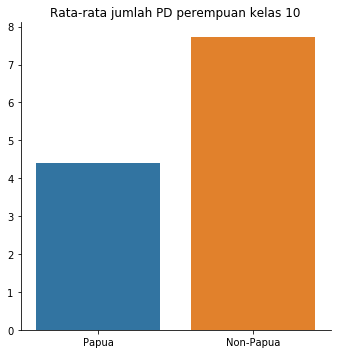

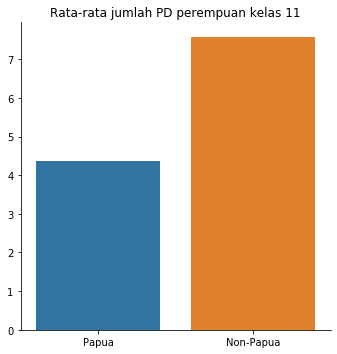

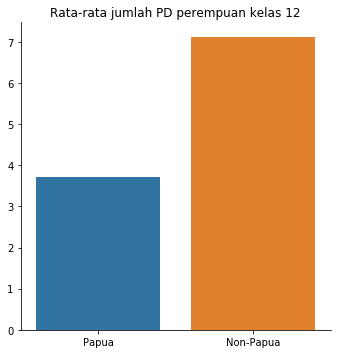

In [43]:
for i in range(1, 13):
    pd_perempuan = get_mean(f'pd_kelas_{i}_perempuan')
    get_bar(pd_perempuan, f'pd_kelas_{i}_perempuan', f'Rata-rata jumlah PD perempuan kelas {i}')

### Ruang kelas

In [44]:
get_mean('jml_rk')

,groups,jml_rk
0,1,7.357143
1,2,8.595657


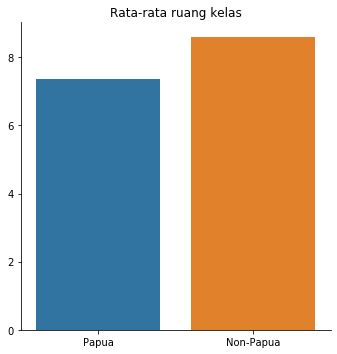

In [45]:
get_bar(get_mean('jml_rk'), 'jml_rk', 'Rata-rata ruang kelas')

### Laboratorium

In [46]:
get_mean('jml_lab')

,groups,jml_lab
0,1,0.499617
1,2,0.723876


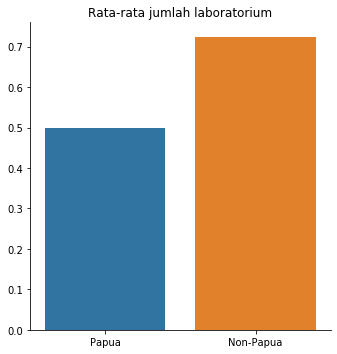

In [47]:
get_bar(get_mean('jml_lab'), 'jml_lab', 'Rata-rata jumlah laboratorium')

### Perpustakaan

In [48]:
get_mean('jml_perpus')

,groups,jml_perpus
0,1,0.531597
1,2,0.809092


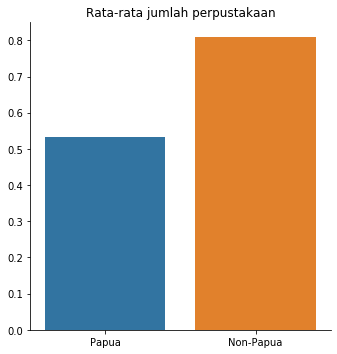

In [49]:
get_bar(get_mean('jml_perpus'), 'jml_perpus', 'Rata-rata jumlah perpustakaan')

### Kecukupan air

In [50]:
set(df['kecukupan_air'])

{'Cukup', 'Kurang', 'Tidak Ada', 'Tidak Diketahui'}

In [51]:
df['is_water_enough'] = df.apply(lambda x: x['kecukupan_air'] == 'Cukup', axis=1)

In [52]:
is_water_enough = df.groupby(['groups', 'is_water_enough'])['sekolah_id_enkrip'].agg('count').to_frame().reset_index()
is_water_enough

,groups,is_water_enough,sekolah_id_enkrip
0,1,False,2286
1,1,True,2968
2,2,False,30264
3,2,True,184580


In [53]:
get_percentage('is_water_enough')

,groups,is_water_enough_pct
0,Papua,0.564903
1,Non-Papua,0.859135


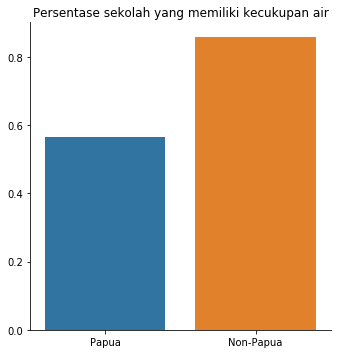

In [54]:
get_bar(get_percentage('is_water_enough'), 'is_water_enough_pct', 'Persentase sekolah yang memiliki kecukupan air')

### Memproses air
Tidak jelas maksudnya apa. Mohon pencerahannya 🙏🏽

In [55]:
set(df['memproses_air'])

{'Tidak', 'Ya'}

In [56]:
df['is_processing_water'] = df.apply(lambda x: x['memproses_air'] == 'Ya', axis=1)

In [57]:
is_processing_water = df.groupby(['groups', 'is_processing_water'])['sekolah_id_enkrip'].agg('count').to_frame().reset_index()
is_processing_water

,groups,is_processing_water,sekolah_id_enkrip
0,1,False,4410
1,1,True,844
2,2,False,161325
3,2,True,53519


In [58]:
get_percentage('is_processing_water')

,groups,is_processing_water_pct
0,Papua,0.160640
1,Non-Papua,0.249106


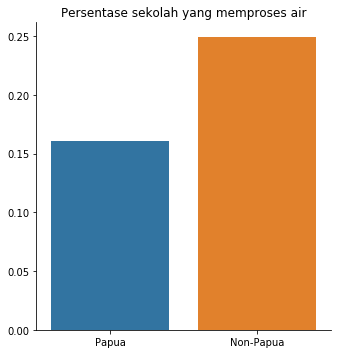

In [59]:
get_bar(get_percentage('is_processing_water'), 'is_processing_water_pct', 'Persentase sekolah yang memproses air')

### Minum siswa

In [60]:
set(df['minum_siswa'])

{'Disediakan sekolah', 'Tidak disediakan'}

In [61]:
df['provided_by_school'] = df.apply(lambda x: x['minum_siswa'] == 'Disediakan sekolah', axis=1)

In [62]:
provided_by_school = df.groupby(['groups', 'provided_by_school'])['sekolah_id_enkrip'].agg('count').to_frame().reset_index()
provided_by_school

,groups,provided_by_school,sekolah_id_enkrip
0,1,False,4400
1,1,True,854
2,2,False,153904
3,2,True,60940


In [63]:
get_percentage('provided_by_school')

,groups,provided_by_school_pct
0,Papua,0.162543
1,Non-Papua,0.283648


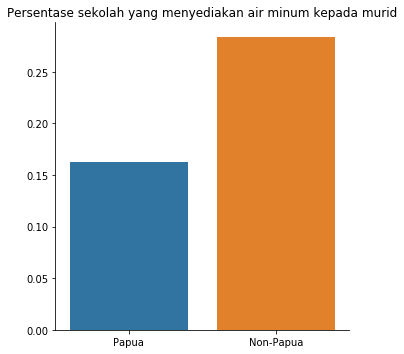

In [64]:
get_bar(get_percentage('provided_by_school'), 'provided_by_school_pct', 'Persentase sekolah yang menyediakan air minum kepada murid')

### Siswa bawa air
Maksudnya murid bawa air minum kali ya? Mohon pencerahannya. 🙏🏽

In [65]:
set(df['siswa_bawa_air'])

{'Tidak', 'Ya'}

In [66]:
df['students_bring_water'] = df.apply(lambda x: x['siswa_bawa_air'] == 'Ya', axis=1)

In [67]:
students_bring_water = df.groupby(['groups', 'students_bring_water'])['sekolah_id_enkrip'].agg('count').to_frame().reset_index()
students_bring_water

,groups,students_bring_water,sekolah_id_enkrip
0,1,False,3650
1,1,True,1604
2,2,False,82062
3,2,True,132782


In [68]:
get_percentage('students_bring_water')

,groups,students_bring_water_pct
0,Papua,0.305291
1,Non-Papua,0.618039


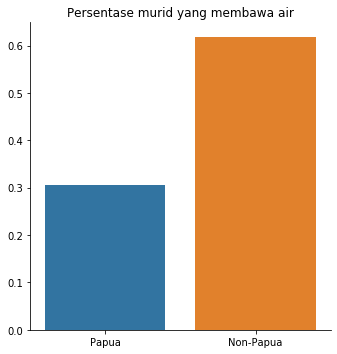

In [69]:
get_bar(get_percentage('students_bring_water'), 'students_bring_water_pct', 'Persentase murid yang membawa air')

### Toilet siswa berkebutuhan khusus

In [70]:
get_mean('toilet_siswa_kk')

,groups,toilet_siswa_kk
0,1,0.398535
1,2,0.609112


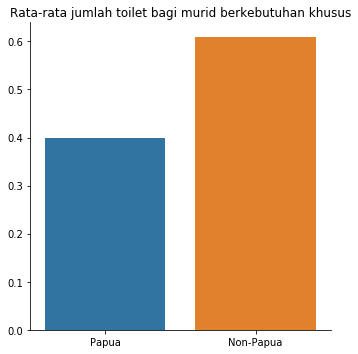

In [71]:
get_bar(get_mean('toilet_siswa_kk'), 'toilet_siswa_kk', 'Rata-rata jumlah toilet bagi murid berkebutuhan khusus')

### Sumber air

In [72]:
set(df['sumber_air_str'])

{'Air hujan',
 'Air kemasan',
 'Air sungai',
 'Lainnya',
 'Ledeng/PAM',
 'Mata air',
 'Mata air tdk terlindungi',
 'Mata air terlindungi',
 'Pompa',
 'Sumur',
 'Sumur terlindungi',
 'Sumur tidak terlindungi',
 nan}

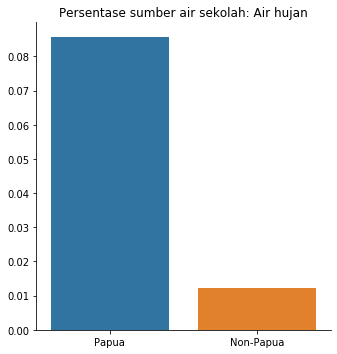

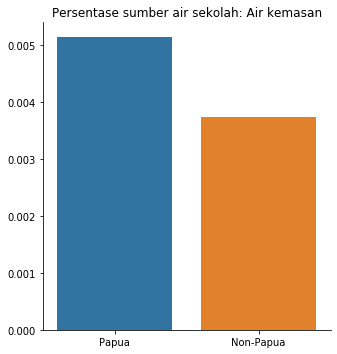

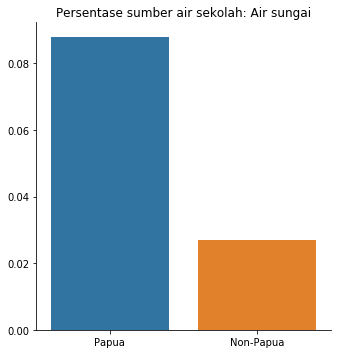

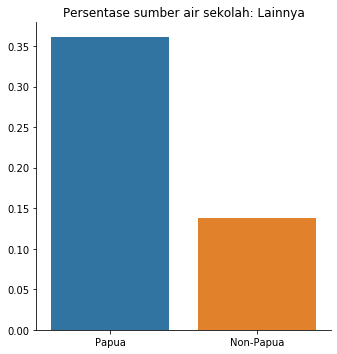

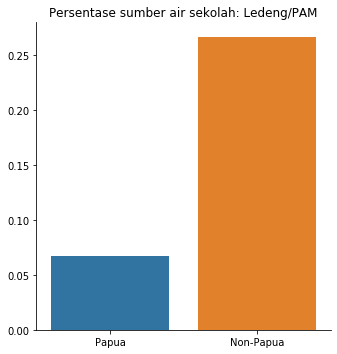

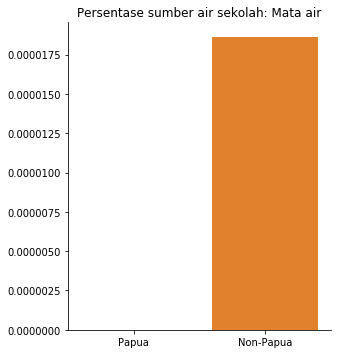

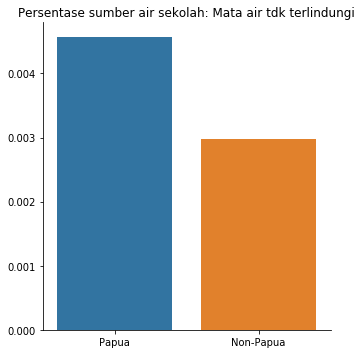

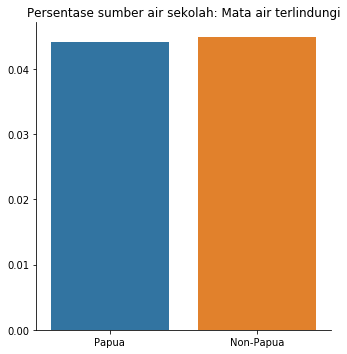

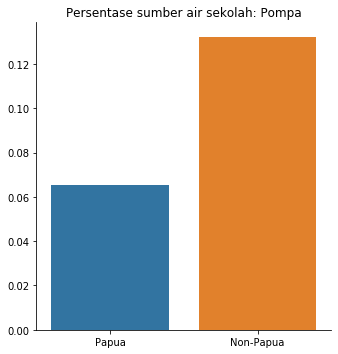

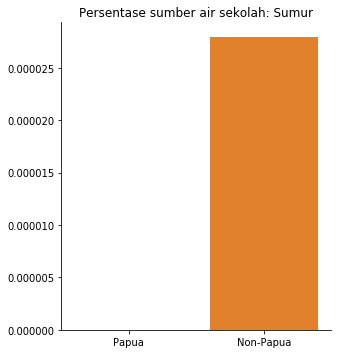

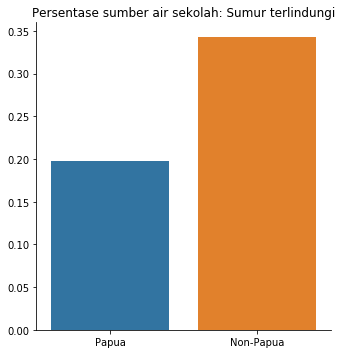

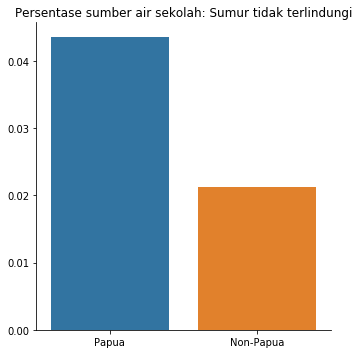

In [73]:
get_bar_multiple('sumber_air_str', 'Persentase sumber air sekolah')

### Ketersediaan air

In [74]:
set(df['ketersediaan_air'])

{'Tidak', 'Ya'}

In [75]:
df['access_to_water'] = df.apply(lambda x: x['ketersediaan_air'] == 'Ya', axis=1)

In [76]:
access_to_water = df.groupby(['groups', 'access_to_water'])['sekolah_id_enkrip'].agg('count').to_frame().reset_index()
access_to_water

,groups,access_to_water,sekolah_id_enkrip
0,1,False,1766
1,1,True,3488
2,2,False,21580
3,2,True,193264


In [77]:
get_percentage('access_to_water')

,groups,access_to_water_pct
0,Papua,0.663875
1,Non-Papua,0.899555


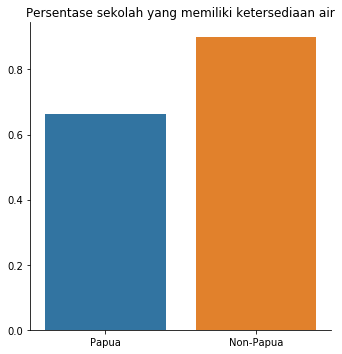

In [78]:
get_bar(get_percentage('access_to_water'), 'access_to_water_pct', 'Persentase sekolah yang memiliki ketersediaan air')

### Tipe jamban

In [79]:
set(df['tipe_jamban'])

{'Cubluk dengan tutup',
 'Cubluk tanpa tutup',
 'Jamban menggantung di atas sungai',
 'Leher angsa (toilet duduk/jongkok)',
 'Tidak tersedia jamban'}

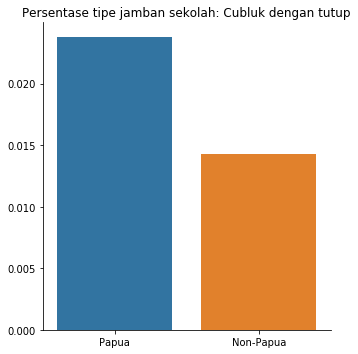

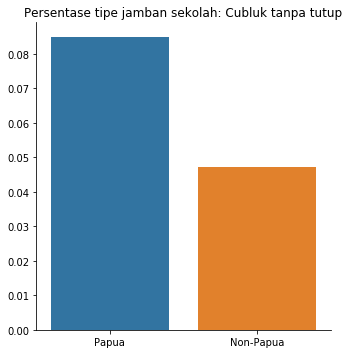

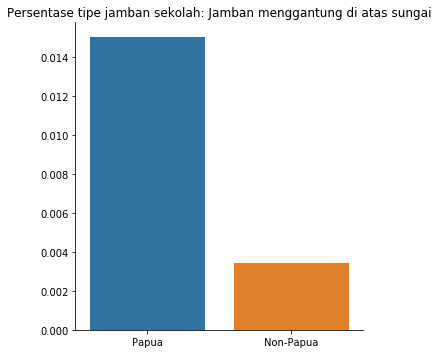

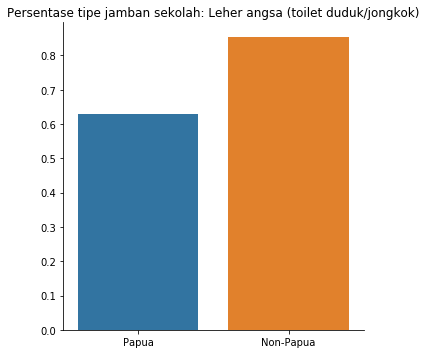

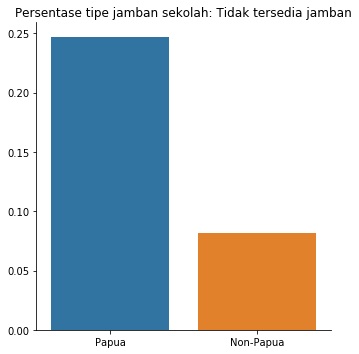

In [80]:
get_bar_multiple('tipe_jamban', 'Persentase tipe jamban sekolah')

### Wastafel 

In [81]:
get_mean('jml_wastafel')

,groups,jml_wastafel
0,1,1.751534
1,2,4.369000


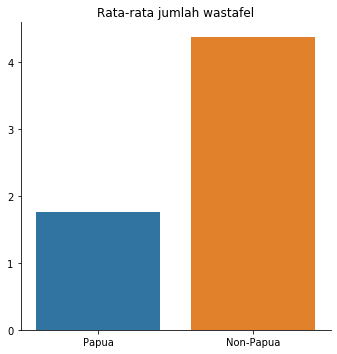

In [82]:
get_bar(get_mean('jml_wastafel'), 'jml_wastafel', 'Rata-rata jumlah wastafel')

### Sabun dan air

In [83]:
set(df['a_sabun_air_mengalir'])

{'Tidak', 'Ya'}

In [84]:
df['water_and_soap'] = df.apply(lambda x: x['a_sabun_air_mengalir'] == 'Ya', axis=1)

In [85]:
water_and_soap = df.groupby(['groups', 'water_and_soap'])['sekolah_id_enkrip'].agg('count').to_frame().reset_index()
water_and_soap

,groups,water_and_soap,sekolah_id_enkrip
0,1,False,3682
1,1,True,1572
2,2,False,87442
3,2,True,127402


In [86]:
get_percentage('water_and_soap')

,groups,water_and_soap_pct
0,Papua,0.299201
1,Non-Papua,0.592998


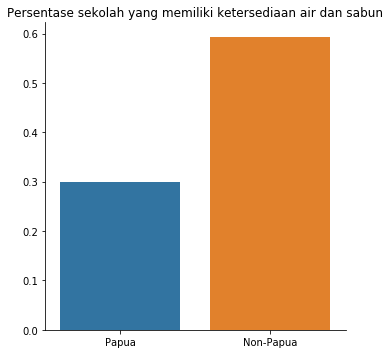

In [87]:
get_bar(get_percentage('water_and_soap'), 'water_and_soap_pct', 'Persentase sekolah yang memiliki ketersediaan air dan sabun')

### Jamban

In [88]:
get_mean('jml_jamban_digunakan')

,groups,jml_jamban_digunakan
0,1,2.745908
1,2,5.000503


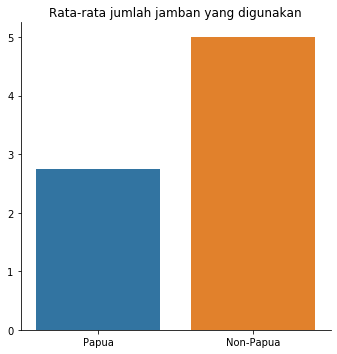

In [89]:
get_bar(get_mean('jml_jamban_digunakan'), 'jml_jamban_digunakan', 'Rata-rata jumlah jamban yang digunakan')

In [90]:
get_mean('jml_jamban_tidak_digunakan')

,groups,jml_jamban_tidak_digunakan
0,1,1.070042
1,2,0.854429


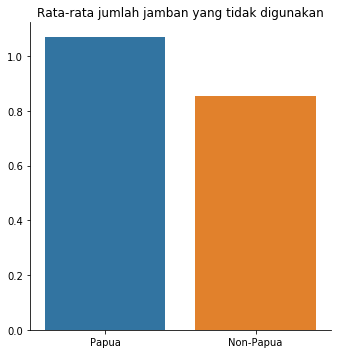

In [91]:
get_bar(get_mean('jml_jamban_tidak_digunakan'), 'jml_jamban_tidak_digunakan', 'Rata-rata jumlah jamban yang tidak digunakan')

# Kesimpulan
Seperti yang sudah kita lihat, kondisi persekolahan di Papua dan Papua Barat jelas tertinggal jika dibandingkan dengan nasional dari beberapa aspek. Semoga dengan ini saya sebagai masyarakat kelas menengah ngehe dapat mengakui privilese hidup yang dikaruniai Tuhan YME. Demikian saya ucapkan wabillahi taufiq wal hidayah, wassalamualikum warahmatullahi wabarakatuh. 🙏🏽